In [1]:
import numpy as np
import sympy as sy
import matplotlib.cm as cm
import matplotlib.pylab as plt
from PIL import Image
import warnings
import time
import os

warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 30
from IPython.display import display, Math

$$z_{n+1}=z^q_n + c $$

In [2]:
def mandelbrot(h, w, f, xmin=-2, xmax=2, ymin=-2, ymax=2, max_iter=50):
    y, x = np.ogrid[ymin:ymax:h*1j, xmin:xmax:w*1j]
    c = x + y*1j
    z = c
    div_iter = max_iter + np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = f(z, c)
        div_test = z * np.conj(z) > 2**2
        div_num = div_test & (div_iter == max_iter)
        div_iter[div_num] = i
        z[div_test] = 2

    return div_iter

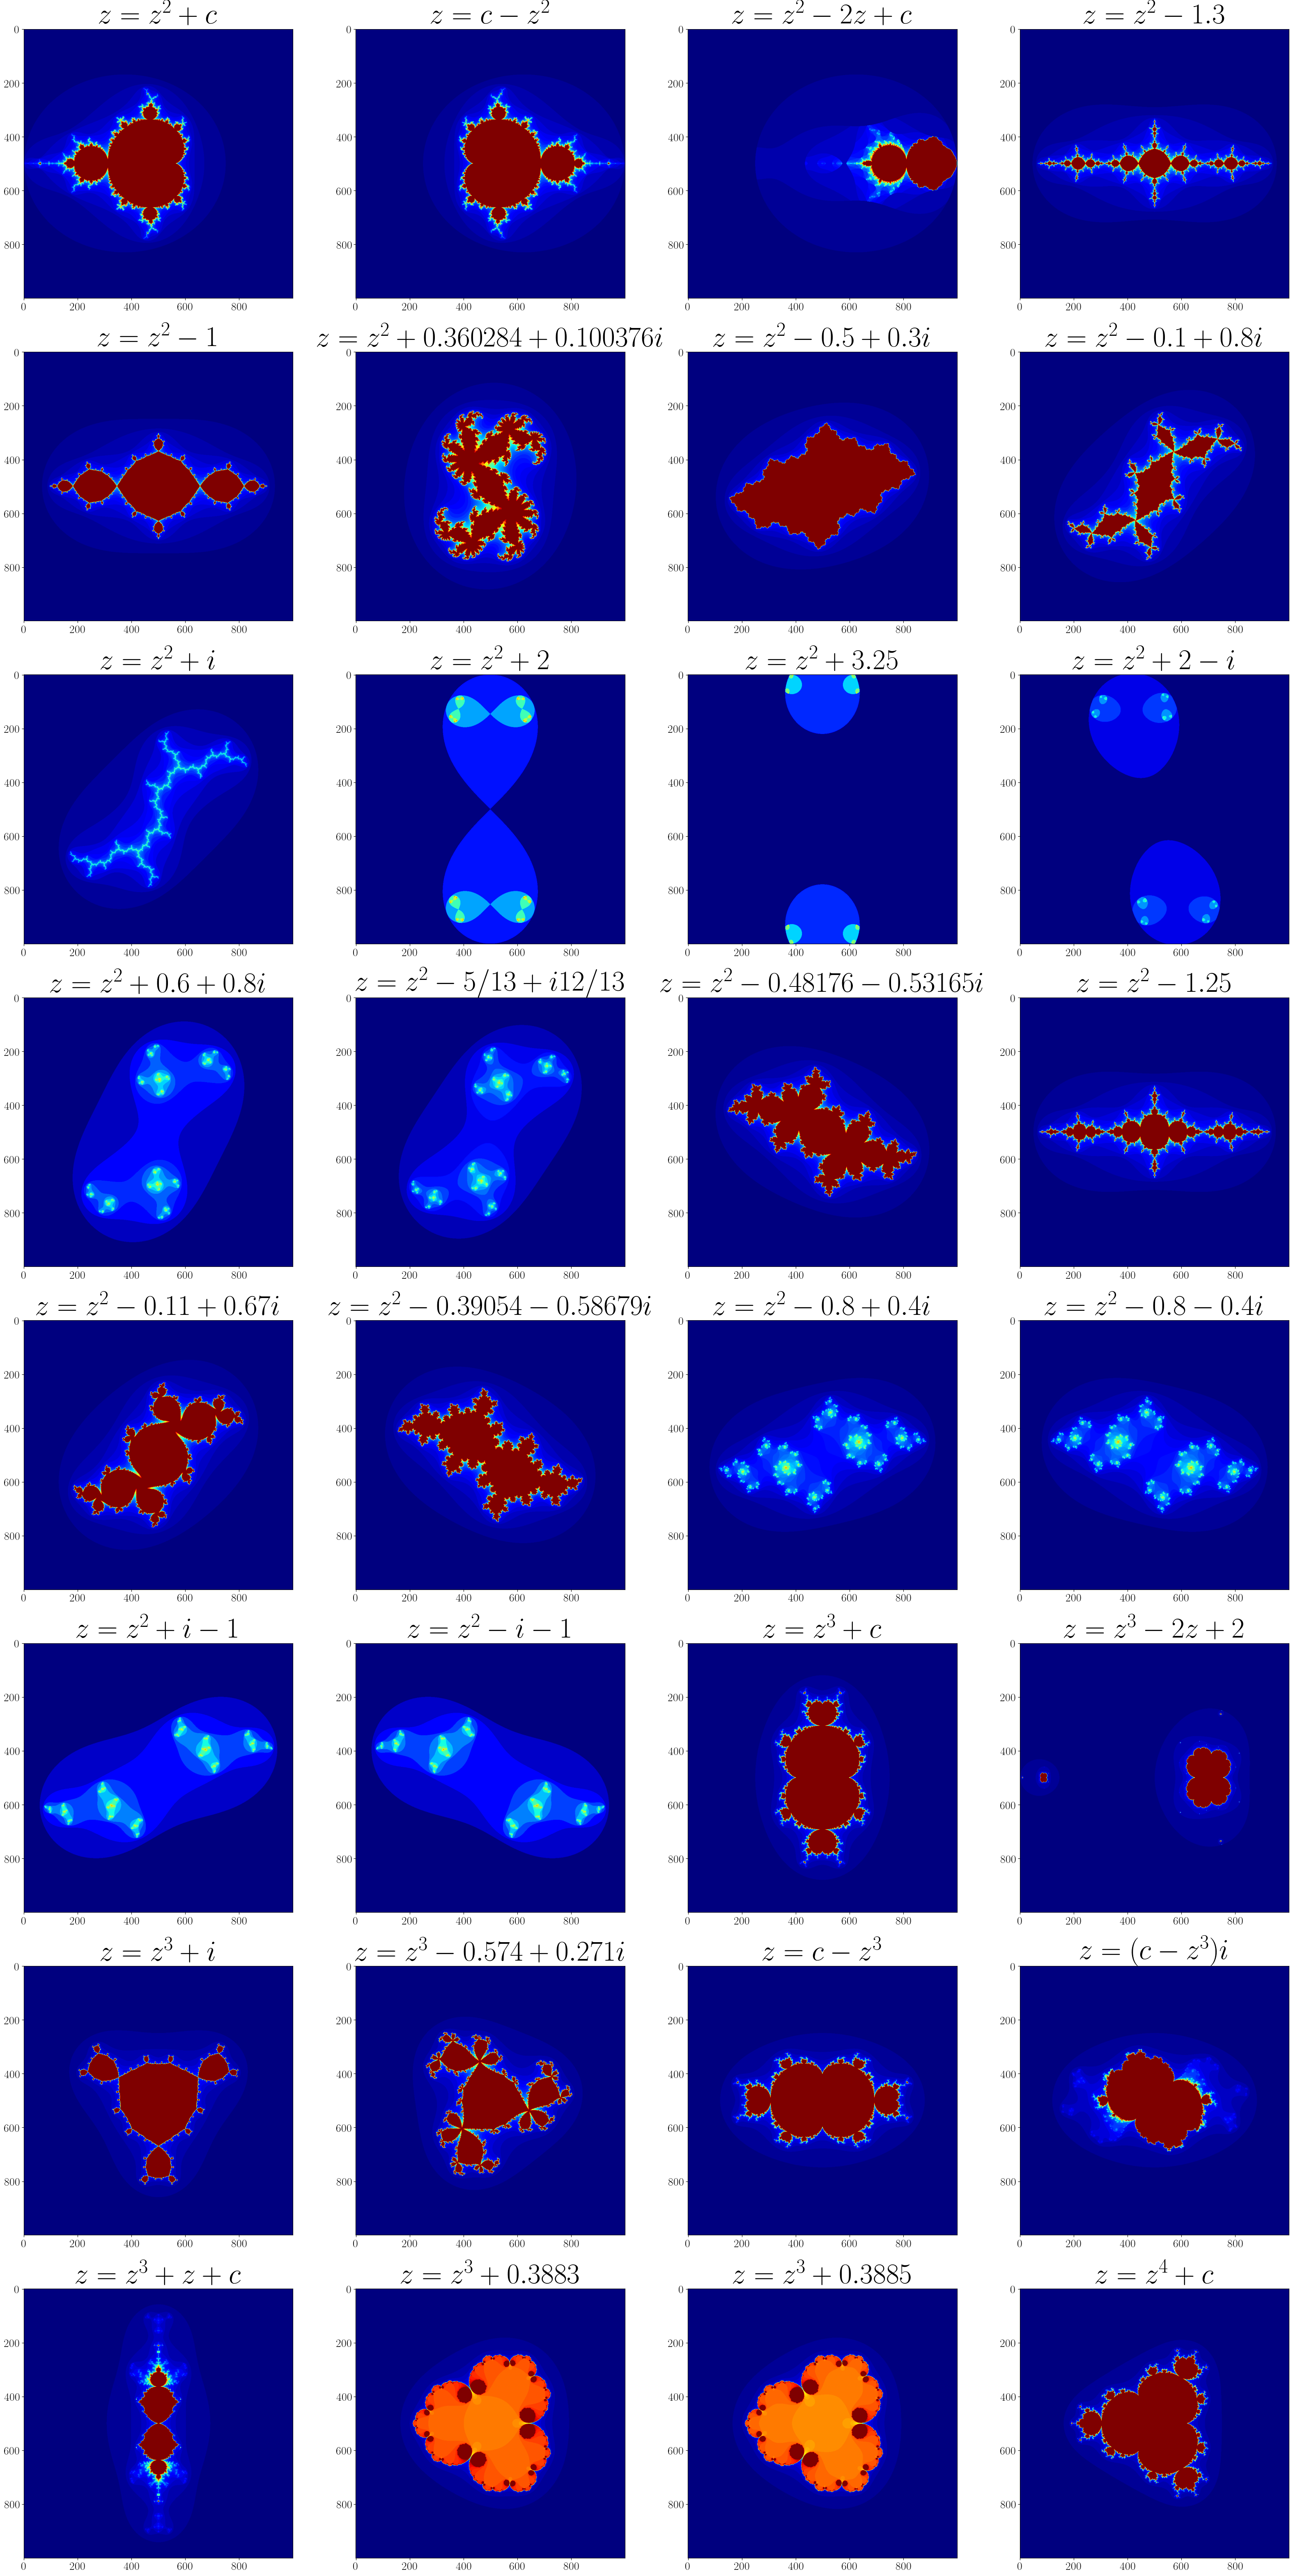

In [3]:
params = [
    { "f": lambda z, c: z**2 + c, "title": "z^2 + c"},
    { "f": lambda z, c: c - z**2, "title": "c - z^2"},
    { "f": lambda z, c: z**2 - 2*z + c, "title": "z^2 - 2z + c"},
    { "f": lambda z, c: z**2 - 1.3, "title": "z^2 - 1.3"},
    { "f": lambda z, c: z**2 - 1, "title": "z^2 - 1"},
    { "f": lambda z, c: z**2 + 0.360284 + 0.100376*1j, "title": "z^2 + 0.360284 + 0.100376i"},
    { "f": lambda z, c: z**2 - 0.5 + 0.3 * 1j, "title": "z^2 - 0.5 + 0.3i"},
    { "f": lambda z, c: z**2 - 0.1 + 0.8 * 1j,  "title": "z^2 - 0.1 + 0.8i"},
    { "f": lambda z, c: z**2 + 1j, "title": "z^2 + i"},
    { "f": lambda z, c: z**2 + 2, "title": "z^2 + 2"},
    { "f": lambda z, c: z**2 + 3.25, "title": "z^2 + 3.25"},
    { "f": lambda z, c: z**2 + 2 - 1j, "title": "z^2 +2 - i"},
    { "f": lambda z, c: z**2 + 0.6 + 0.8*1j, "title": "z^2 + 0.6 + 0.8i"},
    { "f": lambda z, c: z**2 + 5/13 + 12*1j/13, "title": "z^2 - 5/13 + i 12/13 "},
    { "f": lambda z, c: z**2 -0.48176 -0.53165*1j, "title": "z^2 -0.48176 -0.53165i"},
    { "f": lambda z, c: z**2 - 1.25, "title": "z^2 - 1.25"},
    { "f": lambda z, c: z**2 -0.11 + 0.67*1j, "title": "z^2 -0.11 + 0.67i"},
    { "f": lambda z, c: z**2 -0.39054 -0.58679*1j, "title": "z^2 -0.39054 -0.58679i"},
    { "f": lambda z, c: z**2 -0.8 +0.4*1j, "title": "z^2 -0.8 +0.4i"},
    { "f": lambda z, c: z**2 -0.8 -0.4*1j, "title": "z^2 -0.8 -0.4i"},
    { "f": lambda z, c: z**2 + 1j - 1, "title": "z^2 + i - 1"},
    { "f": lambda z, c: z**2 - 1j - 1, "title": "z^2 - i - 1"},
    { "f": lambda z, c: z**3 + c, "title": "z^3 + c"},
    { "f": lambda z, c: z**3 - 2*z + 2, "title": "z^3 - 2z + 2"},
    { "f": lambda z, c: z**3 + 1j, "title": "z^3 + i"},
    { "f": lambda z, c: z**3- 0.574 + 0.271*1j, "title": "z^3 - 0.574 + 0.271i"},
    { "f": lambda z, c: c - z**3 , "title": "c-z^3 "},
    { "f": lambda z, c: 1j*(c-z**3), "title": "(c-z^3)i"},
    { "f": lambda z, c: z**3 + z + c, "title": "z^3 + z + c"},
    { "f": lambda z, c: z**3 + 0.3883, "title": "z^3 + 0.3883"},
    { "f": lambda z, c: z**3 + 0.3885, "title": "z^3 + 0.3885"},
    { "f": lambda z, c: z**4 + c, "title": "z^4 + c"},
  ]

fig, ax = plt.subplots(8, 4, figsize=( 40, 80))
ax = ax.flatten()
for i, p in enumerate(params):
    scale = 1000
    title = p['title']
    
    ax[i].imshow(mandelbrot(scale, scale, p['f']), cmap='jet')
    ax[i].set_title(f"$z = {title}$", fontsize=50)
plt.show()

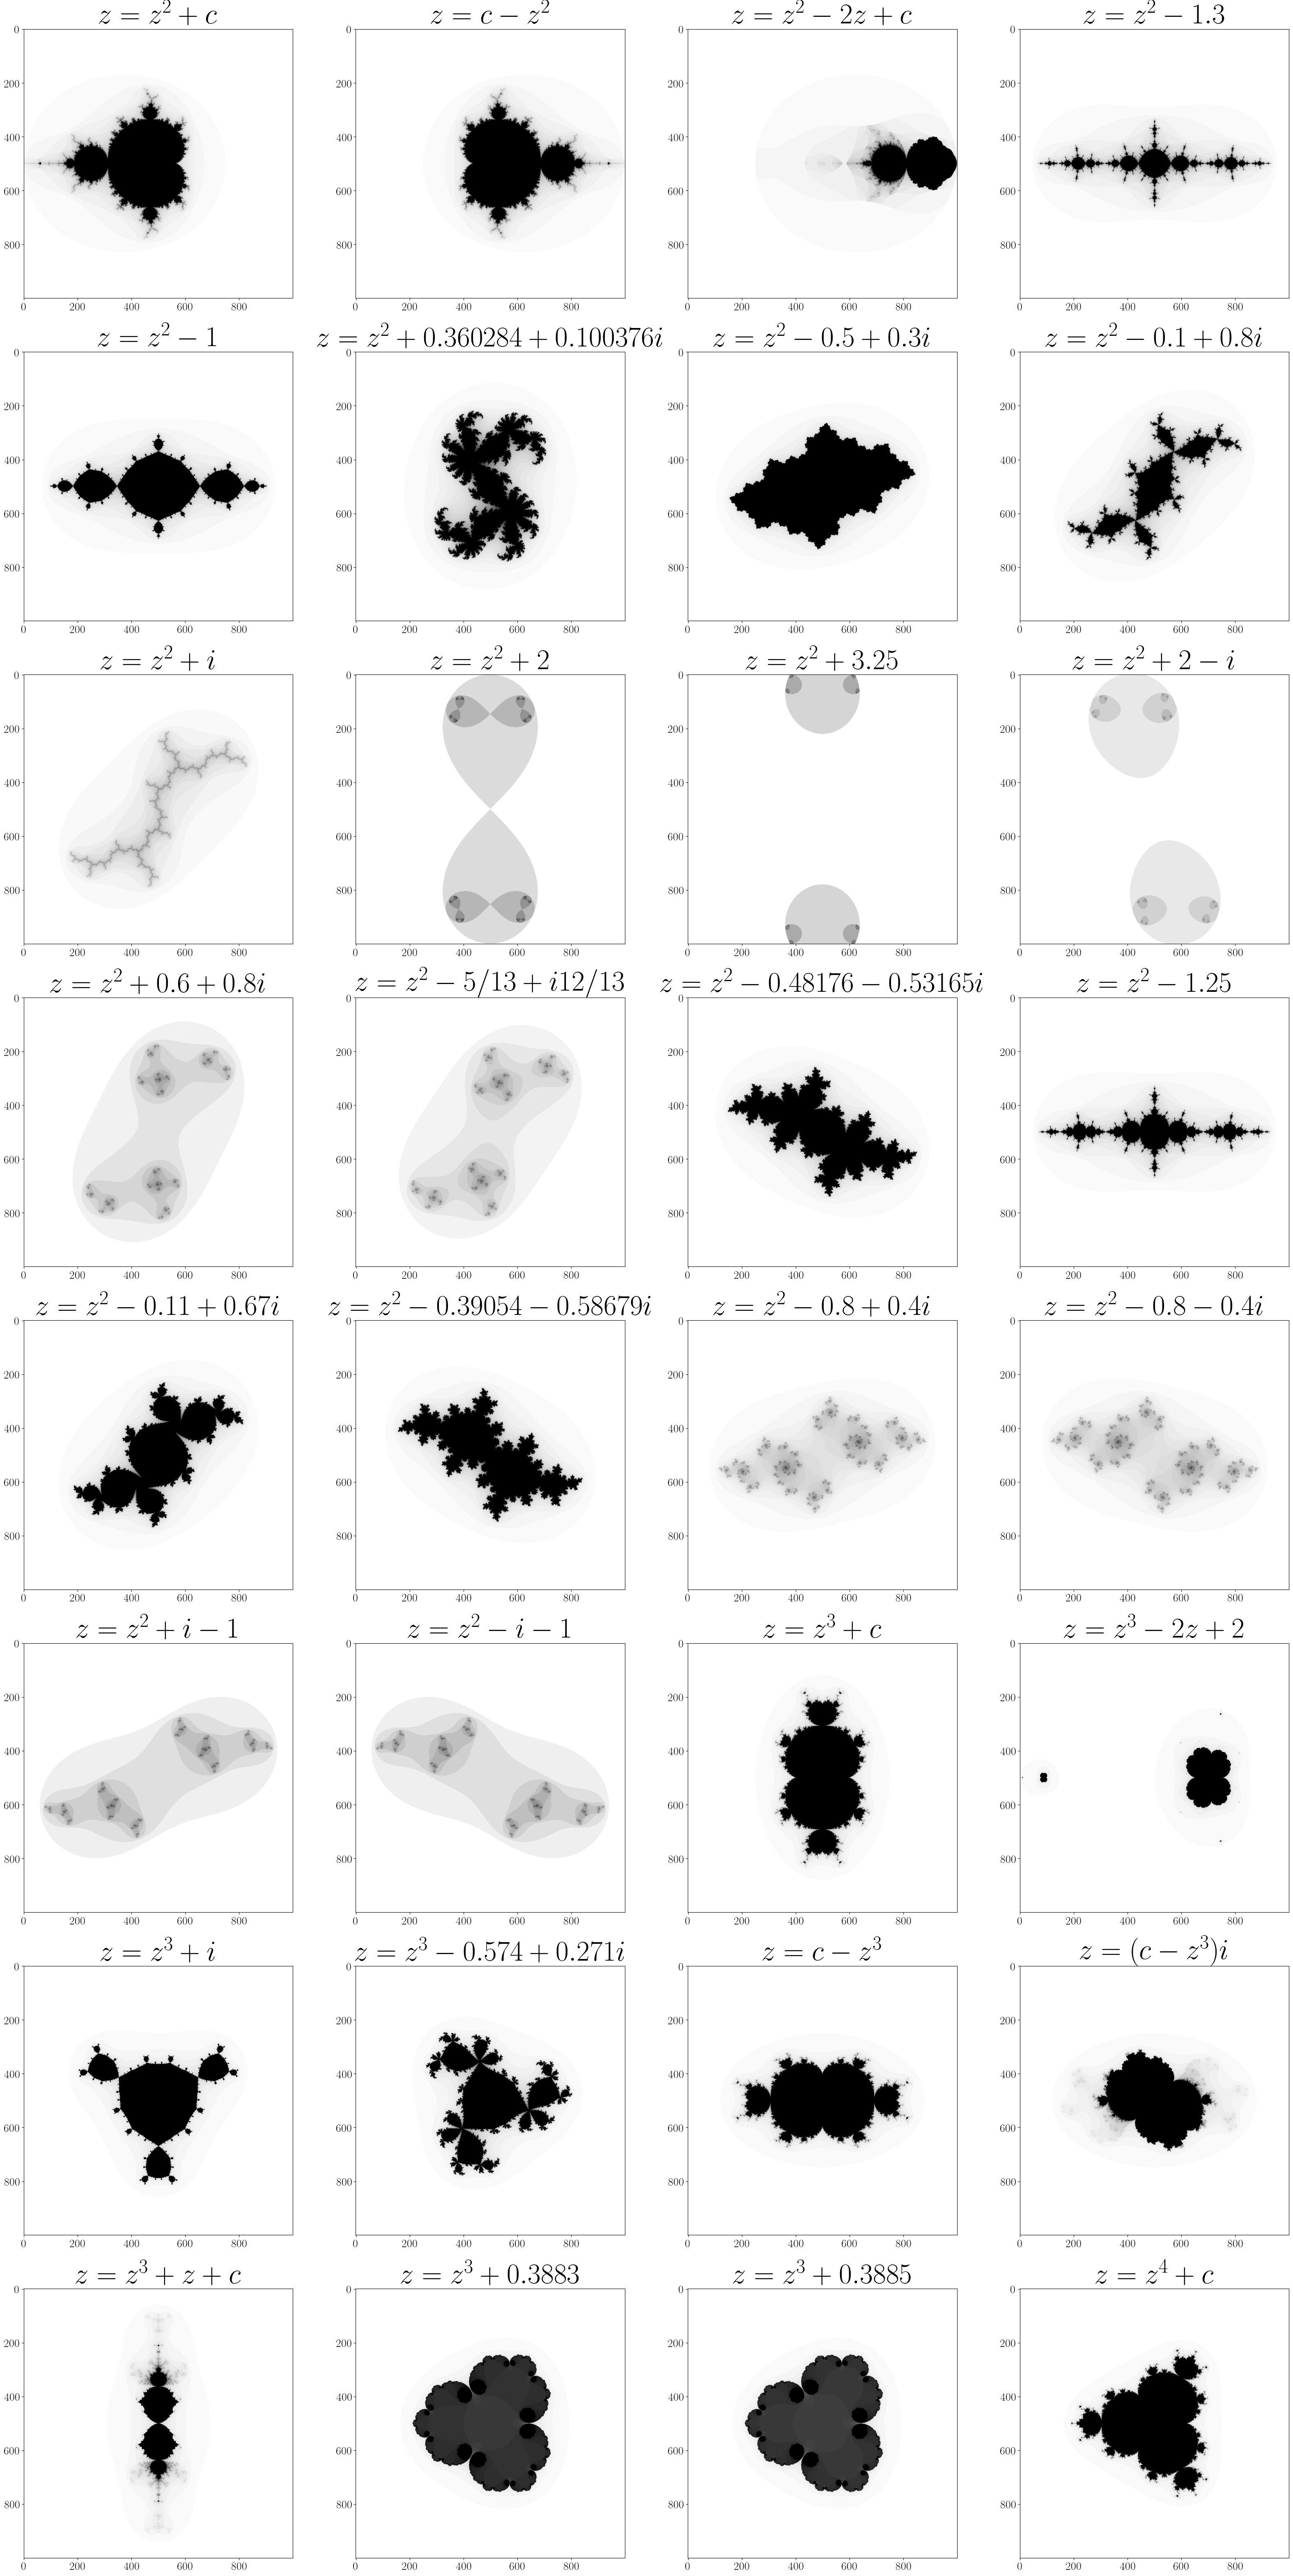

In [11]:
params = [
    { "f": lambda z, c: z**2 + c, "title": "z^2 + c"},
    { "f": lambda z, c: c - z**2, "title": "c - z^2"},
    { "f": lambda z, c: z**2 - 2*z + c, "title": "z^2 - 2z + c"},
    { "f": lambda z, c: z**2 - 1.3, "title": "z^2 - 1.3"},
    { "f": lambda z, c: z**2 - 1, "title": "z^2 - 1"},
    { "f": lambda z, c: z**2 + 0.360284 + 0.100376*1j, "title": "z^2 + 0.360284 + 0.100376i"},
    { "f": lambda z, c: z**2 - 0.5 + 0.3 * 1j, "title": "z^2 - 0.5 + 0.3i"},
    { "f": lambda z, c: z**2 - 0.1 + 0.8 * 1j,  "title": "z^2 - 0.1 + 0.8i"},
    { "f": lambda z, c: z**2 + 1j, "title": "z^2 + i"},
    { "f": lambda z, c: z**2 + 2, "title": "z^2 + 2"},
    { "f": lambda z, c: z**2 + 3.25, "title": "z^2 + 3.25"},
    { "f": lambda z, c: z**2 + 2 - 1j, "title": "z^2 +2 - i"},
    { "f": lambda z, c: z**2 + 0.6 + 0.8*1j, "title": "z^2 + 0.6 + 0.8i"},
    { "f": lambda z, c: z**2 + 5/13 + 12*1j/13, "title": "z^2 - 5/13 + i 12/13 "},
    { "f": lambda z, c: z**2 -0.48176 -0.53165*1j, "title": "z^2 -0.48176 -0.53165i"},
    { "f": lambda z, c: z**2 - 1.25, "title": "z^2 - 1.25"},
    { "f": lambda z, c: z**2 -0.11 + 0.67*1j, "title": "z^2 -0.11 + 0.67i"},
    { "f": lambda z, c: z**2 -0.39054 -0.58679*1j, "title": "z^2 -0.39054 -0.58679i"},
    { "f": lambda z, c: z**2 -0.8 +0.4*1j, "title": "z^2 -0.8 +0.4i"},
    { "f": lambda z, c: z**2 -0.8 -0.4*1j, "title": "z^2 -0.8 -0.4i"},
    { "f": lambda z, c: z**2 + 1j - 1, "title": "z^2 + i - 1"},
    { "f": lambda z, c: z**2 - 1j - 1, "title": "z^2 - i - 1"},
    { "f": lambda z, c: z**3 + c, "title": "z^3 + c"},
    { "f": lambda z, c: z**3 - 2*z + 2, "title": "z^3 - 2z + 2"},
    { "f": lambda z, c: z**3 + 1j, "title": "z^3 + i"},
    { "f": lambda z, c: z**3- 0.574 + 0.271*1j, "title": "z^3 - 0.574 + 0.271i"},
    { "f": lambda z, c: c - z**3 , "title": "c-z^3 "},
    { "f": lambda z, c: 1j*(c-z**3), "title": "(c-z^3)i"},
    { "f": lambda z, c: z**3 + z + c, "title": "z^3 + z + c"},
    { "f": lambda z, c: z**3 + 0.3883, "title": "z^3 + 0.3883"},
    { "f": lambda z, c: z**3 + 0.3885, "title": "z^3 + 0.3885"},
    { "f": lambda z, c: z**4 + c, "title": "z^4 + c"},
  ]

fig, ax = plt.subplots(8, 4, figsize=( 40, 80))
ax = ax.flatten()
for i, p in enumerate(params):
    scale = 1000
    title = p['title']
    
    ax[i].imshow(mandelbrot(scale, scale, p['f']), cmap='binary')
    ax[i].set_title(f"$z = {title}$", fontsize=50)
plt.show()

$$z_{n+1}=c\exp(z^q_n)  $$

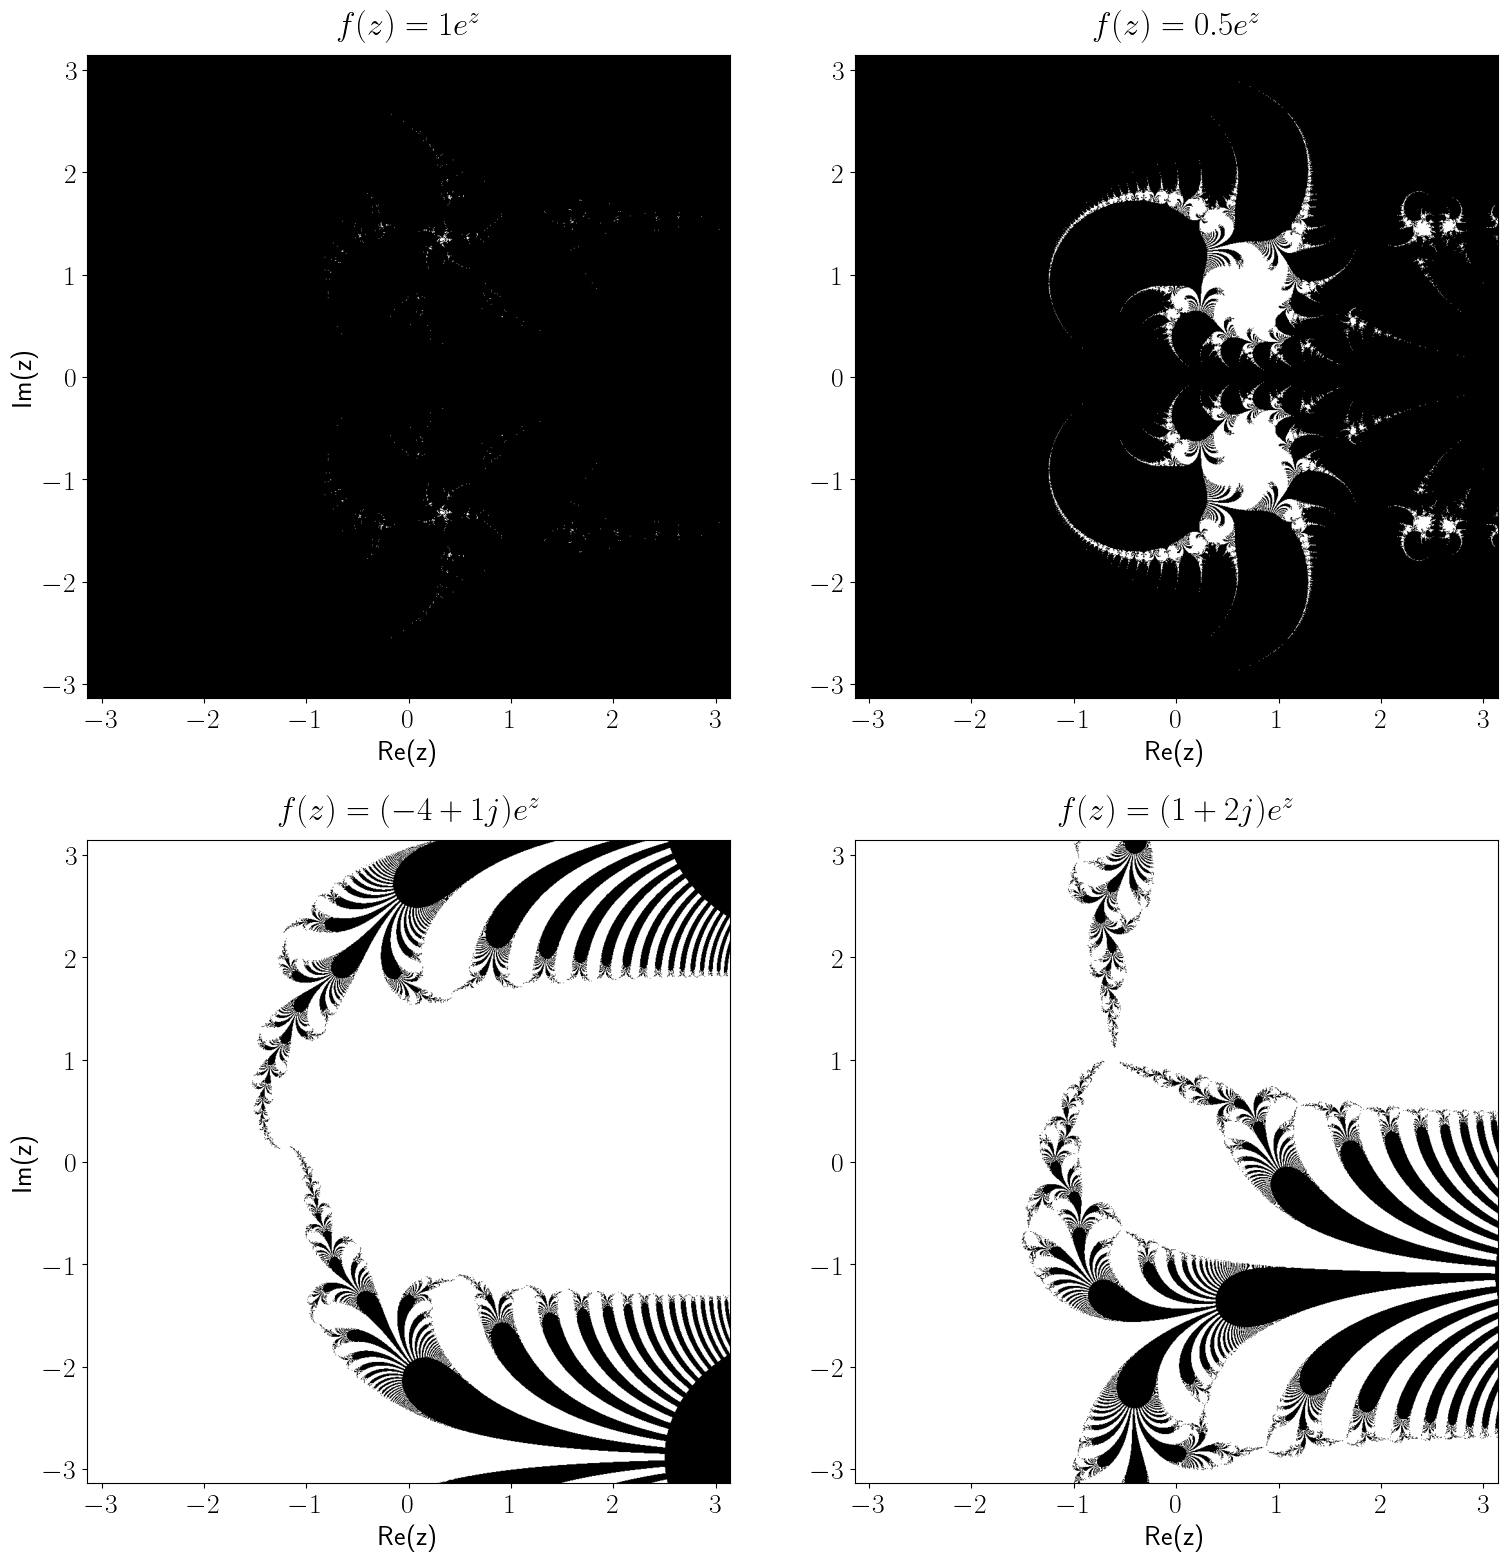

In [4]:
def julia_exp(c, grid_size=1000, xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi), max_iter=20, escape_thresh=50):
    x = np.linspace(*xlim, grid_size)
    y = np.linspace(*ylim, grid_size)
    X, Y = np.meshgrid(x, y)
    Z0 = X + 1j * Y
    Z = Z0.copy()
    escaped = np.zeros(Z.shape, dtype=bool)
    for _ in range(max_iter):
        Z = c * np.exp(Z)
        escaped |= Z.real > escape_thresh
    return escaped

c_values = [1, 0.5, -4 + 1j, 1 + 2j]
titles = [f'$c = {c}$' for c in c_values]

fig, ax = plt.subplots(2, 2, figsize=(16, 16))  # probably meant 8 not 80
ax = ax.flatten()

for i, (c, axis) in enumerate(zip(c_values, ax)):
    julia_set = julia_exp(c=c)
    axis.imshow(julia_set, extent=(-np.pi, np.pi, -np.pi, np.pi), cmap='binary', origin='lower')  #cmap='jet'
    axis.set_title(f'$f(z) = {c} e^z$', y=1.02)
    axis.set_xlabel('Re(z)')
    if i % 2 == 0:
        axis.set_ylabel('Im(z)')
    axis.set_aspect('equal')
    axis.grid(False)

plt.tight_layout()
plt.show()

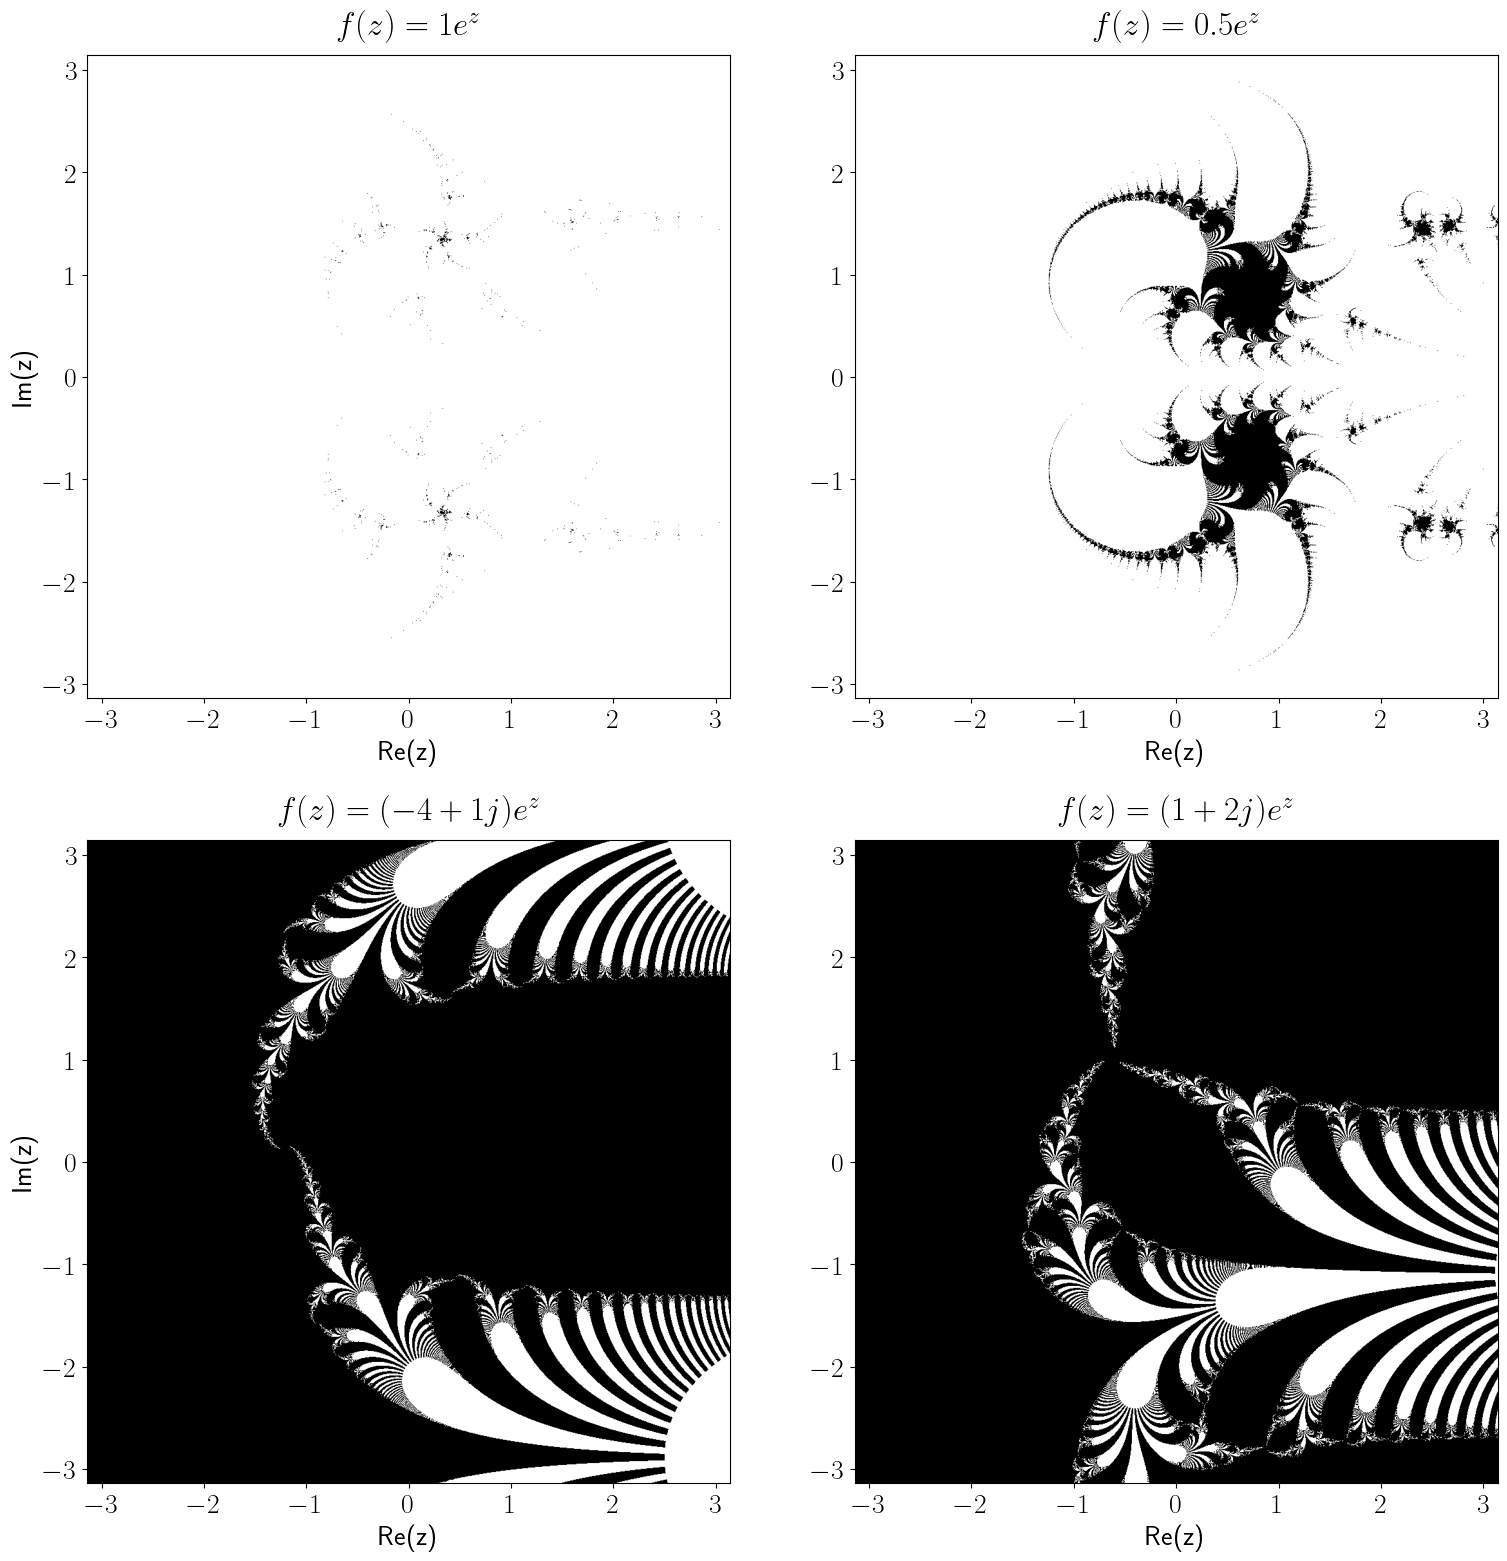

In [6]:
def julia_exp(c, grid_size=1000, xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi), max_iter=20, escape_thresh=50):
    x = np.linspace(*xlim, grid_size)
    y = np.linspace(*ylim, grid_size)
    X, Y = np.meshgrid(x, y)
    Z0 = X + 1j * Y
    escaped = np.zeros(Z0.shape, dtype=bool)    # Track escape
    Z = Z0.copy()
    
    for i in range(max_iter):
        Z = c * np.exp(Z)
        escaped |= (Z.real > escape_thresh)
    return ~escaped

c_values = [1, 0.5, -4 + 1j, 1 + 2j]
titles = [f'$c = {c}$' for c in c_values]

fig, ax = plt.subplots(2, 2, figsize=(16, 16))  # probably meant 8 not 80
ax = ax.flatten()

for i, (c, axis) in enumerate(zip(c_values, ax)):
    julia_set = julia_exp(c=c)
    axis.imshow(julia_set, extent=(-np.pi, np.pi, -np.pi, np.pi), cmap='binary', origin='lower')
    axis.set_title(f'$f(z) = {c} e^z$', y=1.02)
    axis.set_xlabel('Re(z)')
    if i % 2 == 0:
        axis.set_ylabel('Im(z)')
    axis.set_aspect('equal')
    axis.grid(False)
plt.tight_layout()
plt.show()

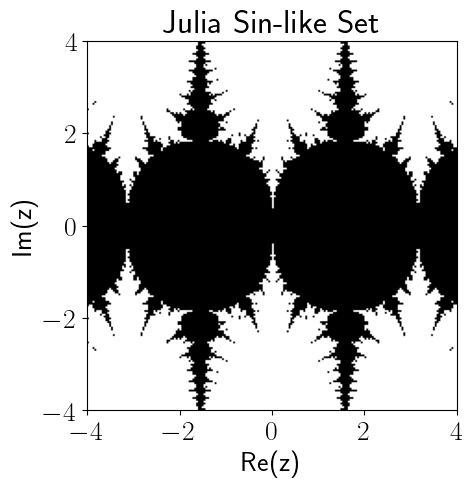

In [6]:
grid = 200
width, height = grid, grid
x_min, x_max = -4, 4
y_min, y_max = -4, 4
img = np.zeros((height, width))
c = 1

for i in range(width):
    for j in range(height):
        x0 = x_min + (x_max - x_min) * i / width
        y0 = y_max - (y_max - y_min) * j / height             # y reversed (top to bottom)
        x, y = x0, y0
        for n in range(25):
            x1 = c * np.sin(x) * (np.exp(y) + np.exp(-y)) / 2  # sinh and cosh alternative
            y1 = c * np.cos(x) * (np.exp(y) - np.exp(-y)) / 2
            if abs(y1) > 50:
                break
            x, y = x1, y1
        else:
            img[j, i] = 1                                       # only if didn't break → inside set

plt.imshow(img, cmap='binary', extent=[x_min, x_max, y_min, y_max])
plt.title('Julia Sin-like Set')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.gca().set_aspect('equal')
plt.grid(False)
plt.show()

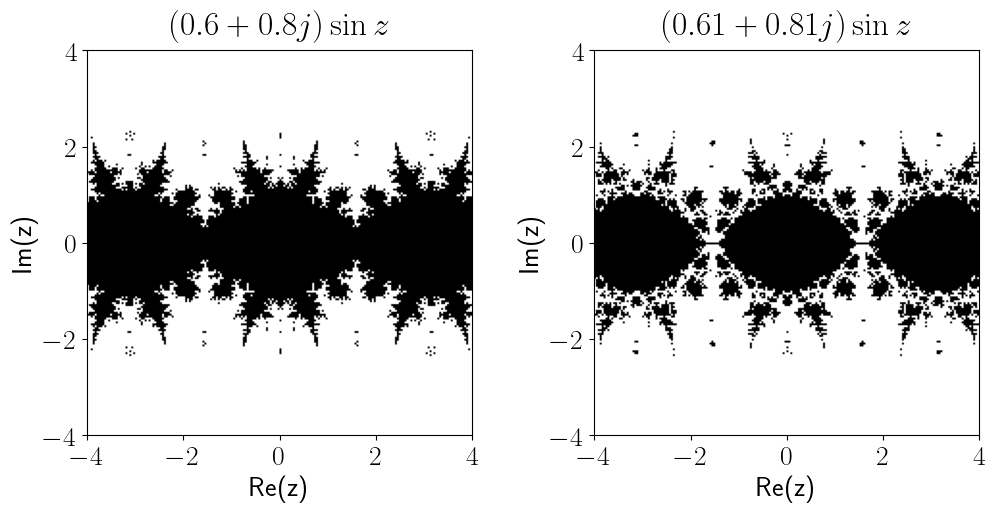

In [8]:
def julia_sin(c, x_min, x_max, y_min, y_max, grid):
    width, height = grid, grid
    img = np.zeros((height, width))

    for i in range(width):
        for j in range(height):
            x0 = x_min + (x_max - x_min) * i / width
            y0 = y_max - (y_max - y_min) * j / height
            x, y = x0, y0

            for n in range(25):
                x1 = c * np.sin(x) * (np.exp(y) + np.exp(-y)) / 2  # sinh and cosh alternative
                y1 = c * np.cos(x) * (np.exp(y) - np.exp(-y)) / 2
                
                if abs(y1) > 50:
                    break
                x, y = x1, y1
            else:
                img[j, i] = 1
                    
    return img



x_min, x_max = -4,4
y_min, y_max = -4,4
grid = 200

fig = plt.figure(figsize=(12,5))

for i, c in enumerate([0.6 + 0.8j, 0.61 + 0.81j]):
    img = julia_sin(c , x_min, x_max, y_min, y_max, grid)
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(img, cmap='binary', extent=[x_min, x_max, y_min, y_max])
    ax.set_title(f'${c} \sin z $', y=1.02)
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.set_aspect('equal')
    ax.grid(False)
plt.show()

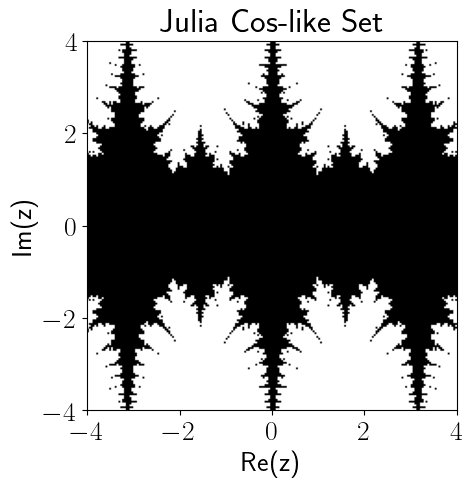

In [9]:
grid = 200
width, height = grid, grid
x_min, x_max = -4, 4
y_min, y_max = -4, 4
img = np.zeros((height, width))
c = 1

for i in range(width):
    for j in range(height):
        x0 = x_min + (x_max - x_min) * i / width
        y0 = y_max - (y_max - y_min) * j / height
        x, y = x0, y0
        for n in range(25):
            x1 =   c * np.cos(x) * (np.exp(y) + np.exp(-y)) / 2   # cosh(y)
            y1 = - c * np.sin(x) * (np.exp(y) - np.exp(-y)) / 2  # -sinh(y)
            if abs(y1) > 50:
                break
            x, y = x1, y1
        else:
            img[j, i] = 1

plt.imshow(img, cmap='binary', extent=[x_min, x_max, y_min, y_max])
plt.title('Julia Cos-like Set')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.gca().set_aspect('equal')
plt.grid(False)
plt.show()

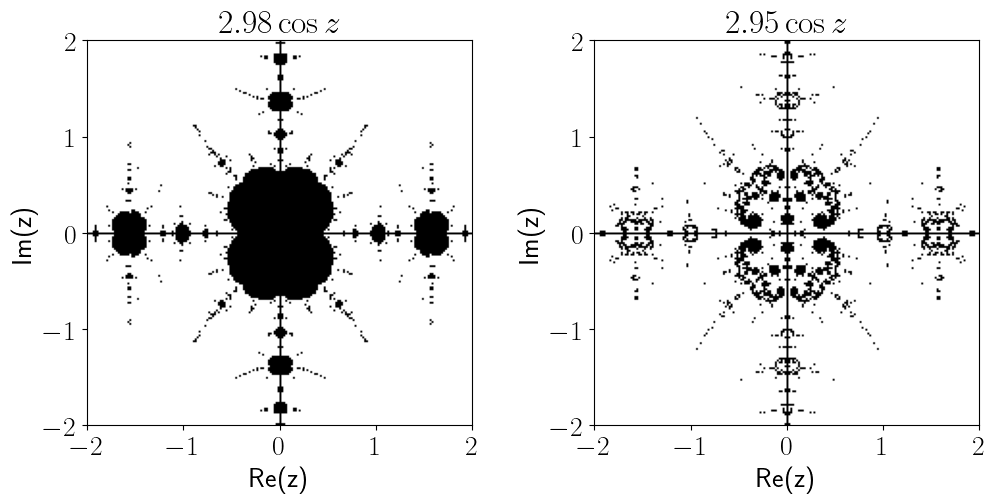

In [10]:
def julia_cos(c, x_min, x_max, y_min, y_max, grid):
    width, height = grid, grid
    img = np.zeros((height, width))

    for i in range(width):
        for j in range(height):
            x0 = x_min + (x_max - x_min) * i / width
            y0 = y_max - (y_max - y_min) * j / height
            x, y = x0, y0

            for n in range(25):
                x1 =   c * np.cos(x) * (np.exp(y) + np.exp(-y)) / 2   # cosh(y)
                y1 = - c * np.sin(x) * (np.exp(y) - np.exp(-y)) / 2  # -sinh(y)

                if abs(y1) > 50:
                    break
                x, y = x1, y1
            else:
                img[j, i] = 1
                    
    return img



x_min, x_max = -2,2
y_min, y_max = -2,2
grid = 200

fig = plt.figure(figsize=(12,5))

for i, c in enumerate([2.98, 2.95]):
    img = julia_cos(c , x_min, x_max, y_min, y_max, grid)
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(img, cmap='binary', extent=[x_min, x_max, y_min, y_max])
    ax.set_title(f'${c} \cos z$')
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.set_aspect('equal')
    ax.grid(False)
plt.show()